In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
from tqdm import tqdm
import nibabel as nib
import nilearn as nil
import os
from skimage.transform import resize

In [2]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

# DATA

## Test

In [3]:
number = np.random.randint(300)
print(number)
if number < 100:
    number = f'0{str(number)}'
    print(number)

number = 206

208


In [4]:
test = nib.load(f'/root/project/kits/kits21/kits21/data/case_00{number}/imaging.nii.gz').get_fdata()
test_and = nib.load(f'/root/project/kits/kits21/kits21/data/case_00{number}/aggregated_AND_seg.nii.gz').get_fdata()
test_k1 = nib.load(f'/root/project/kits/kits21/kits21/data/case_00{number}/segmentations/kidney_instance-1_annotation-1.nii.gz').get_fdata()
test_k2 = nib.load(f'/root/project/kits/kits21/kits21/data/case_00{number}/segmentations/kidney_instance-2_annotation-1.nii.gz').get_fdata()
test_t = nib.load(f'/root/project/kits/kits21/kits21/data/case_00{number}/segmentations/tumor_instance-1_annotation-1.nii.gz').get_fdata()

In [5]:
tm = []
for j,i in tqdm(enumerate(test_and)):
    if np.unique(i).max() == 3.0:
        tm.append(j)

60it [00:00, 174.41it/s]


In [6]:
tm

[39, 40, 41, 42, 43, 44, 45]

42


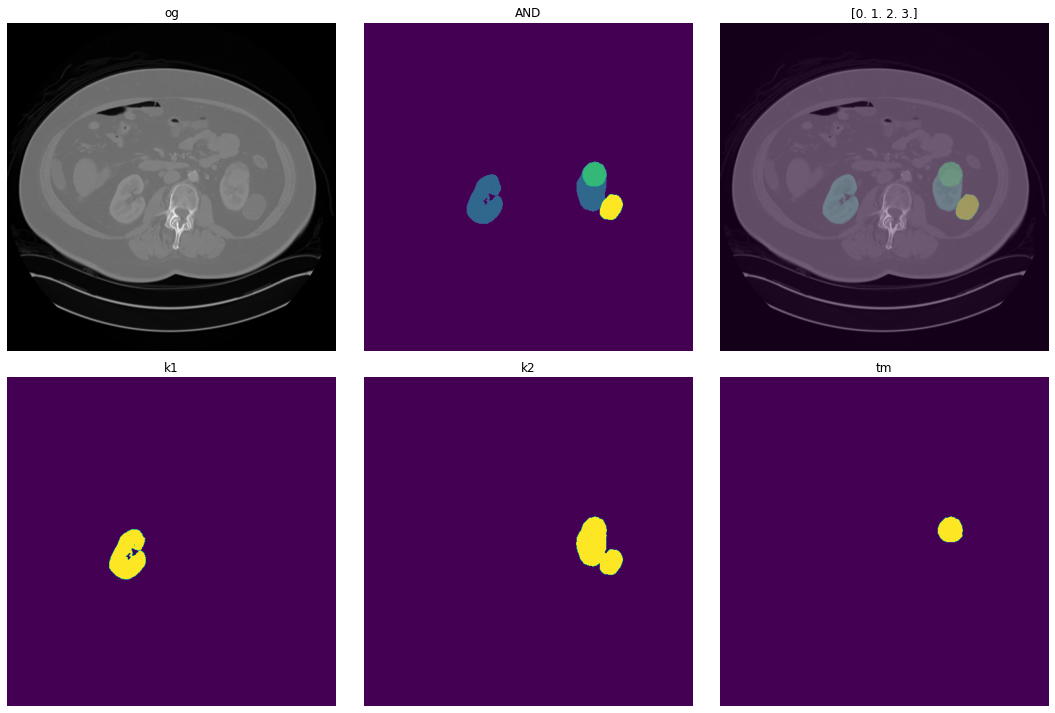

In [7]:
kidney_numpy = np.random.choice(tm)
n_slice = 42
print(n_slice)
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.title('og')
plt.axis('off')
plt.subplot(232)
plt.imshow(test_and[n_slice,:,:])
plt.title(f'{np.unique(test_and[n_slice,:,:])}')
plt.title('AND')
plt.axis('off')
plt.subplot(233)
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(test_and[n_slice,:,:],alpha=0.3)
plt.title(f'{np.unique(test_and[n_slice,:,:])}')
plt.axis('off')
plt.subplot(234)
plt.imshow(test_k1[n_slice,:,:])
plt.title('k1')
plt.axis('off')
plt.subplot(235)
plt.imshow(test_k2[n_slice,:,:])
plt.title('k2')
plt.axis('off')
plt.subplot(236)
plt.imshow(test_t[n_slice,:,:])
plt.title('tm')
plt.axis('off')
plt.tight_layout()

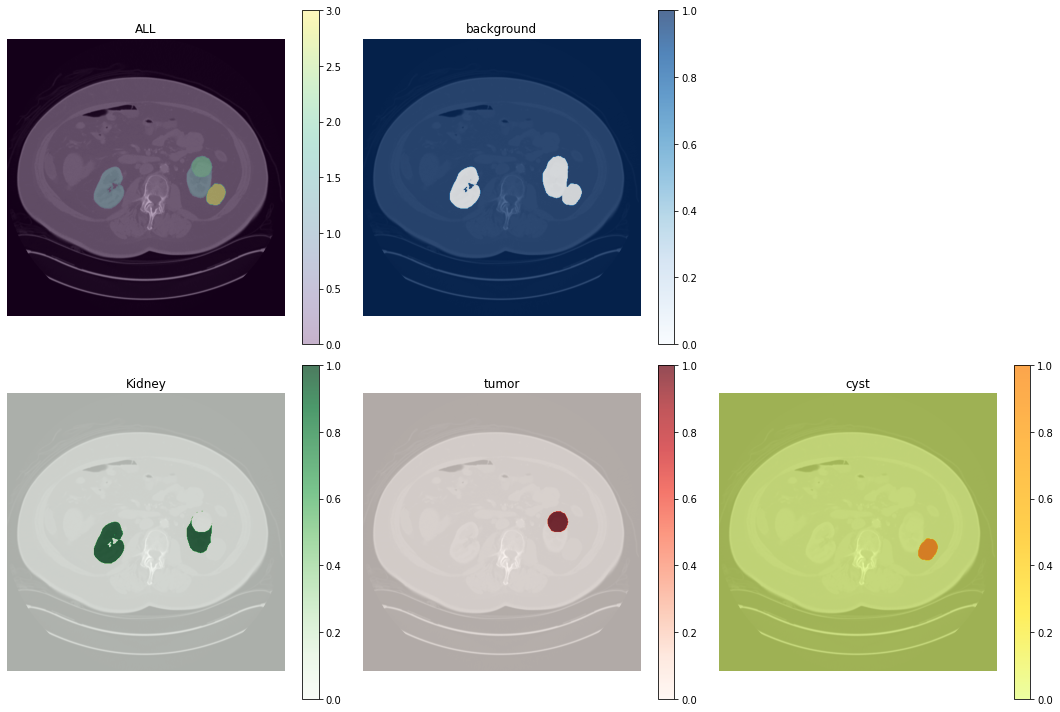

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(test_and[n_slice,:,:],alpha=0.3)
plt.title('ALL')
plt.axis('off')
plt.colorbar()

plt.subplot(232)
background = test_and[n_slice,:,:]== 0
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(background,alpha=0.7,cmap='Blues')
plt.title('background')
plt.axis('off')
plt.colorbar()

plt.subplot(234)
Kidney = test_and[n_slice,:,:]== 1
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(Kidney,alpha=0.7,cmap='Greens')
plt.title('Kidney')
plt.axis('off')
plt.colorbar()

plt.subplot(235)
tumor = test_and[n_slice,:,:]== 2
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(tumor,alpha=0.7,cmap='Reds')
plt.title('tumor')
plt.axis('off')
plt.colorbar()

plt.subplot(236)
cyst = test_and[n_slice,:,:]== 3
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(cyst,alpha=0.7,cmap='Wistia')
plt.title('cyst')
plt.axis('off')
plt.colorbar()

plt.tight_layout()

In [9]:
number = 188
test = nib.load(f'/root/project/kits/kits21/kits21/data/case_00{number}/imaging.nii.gz').get_fdata()
test_and = nib.load(f'/root/project/kits/kits21/kits21/data/case_00{number}/aggregated_AND_seg.nii.gz').get_fdata()
test_k1 = nib.load(f'/root/project/kits/kits21/kits21/data/case_00{number}/segmentations/kidney_instance-1_annotation-1.nii.gz').get_fdata()
test_k2 = nib.load(f'/root/project/kits/kits21/kits21/data/case_00{number}/segmentations/kidney_instance-2_annotation-1.nii.gz').get_fdata()
test_t = nib.load(f'/root/project/kits/kits21/kits21/data/case_00{number}/segmentations/tumor_instance-1_annotation-1.nii.gz').get_fdata()

In [10]:
tm = []
for j,i in tqdm(enumerate(test_and)):
    if np.unique(i).max() == 3.0:
        tm.append(j)

365it [00:01, 183.17it/s]


In [11]:
len(test)

365

157


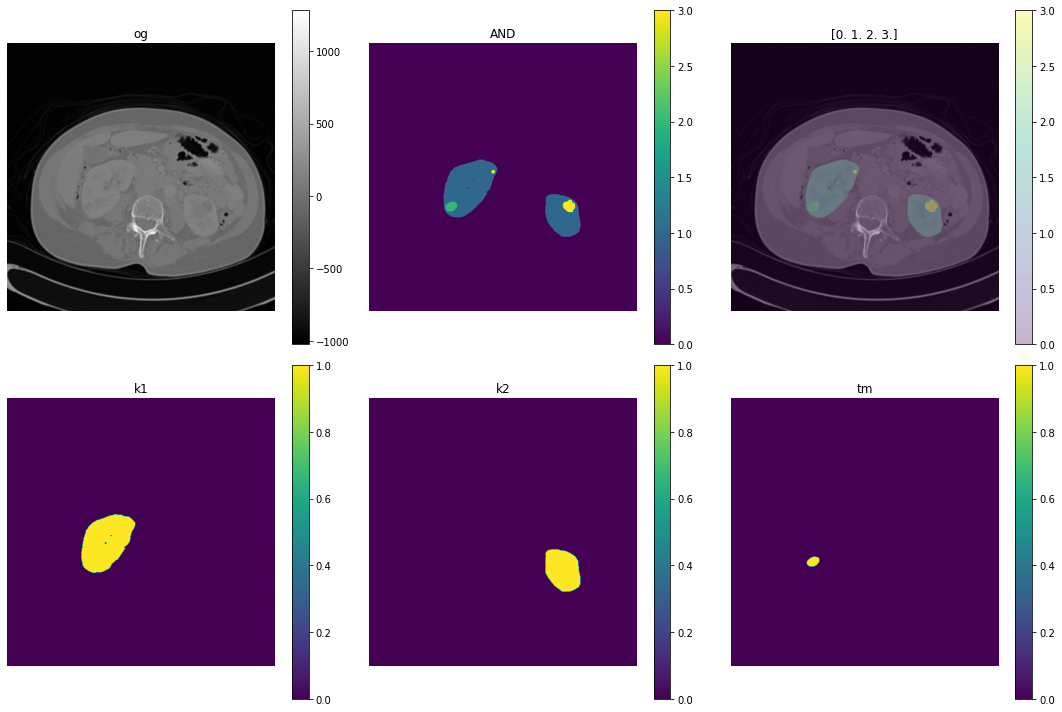

In [12]:
n_slice = np.random.choice(tm)
n_slice = 157
print(n_slice)
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.title('og')
plt.axis('off')
plt.colorbar()
plt.subplot(232)
plt.imshow(test_and[n_slice,:,:])
plt.title(f'{np.unique(test_and[n_slice,:,:])}')
plt.title('AND')
plt.axis('off')
plt.colorbar()
plt.subplot(233)
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(test_and[n_slice,:,:],alpha=0.3)
plt.title(f'{np.unique(test_and[n_slice,:,:])}')
plt.axis('off')
plt.colorbar()
plt.subplot(234)
plt.imshow(test_k1[n_slice,:,:])
plt.title('k1')
plt.axis('off')
plt.colorbar()
plt.subplot(235)
plt.imshow(test_k2[n_slice,:,:])
plt.title('k2')
plt.axis('off')
plt.colorbar()
plt.subplot(236)
plt.imshow(test_t[n_slice,:,:])
plt.title('tm')
plt.axis('off')
plt.colorbar()
plt.tight_layout()


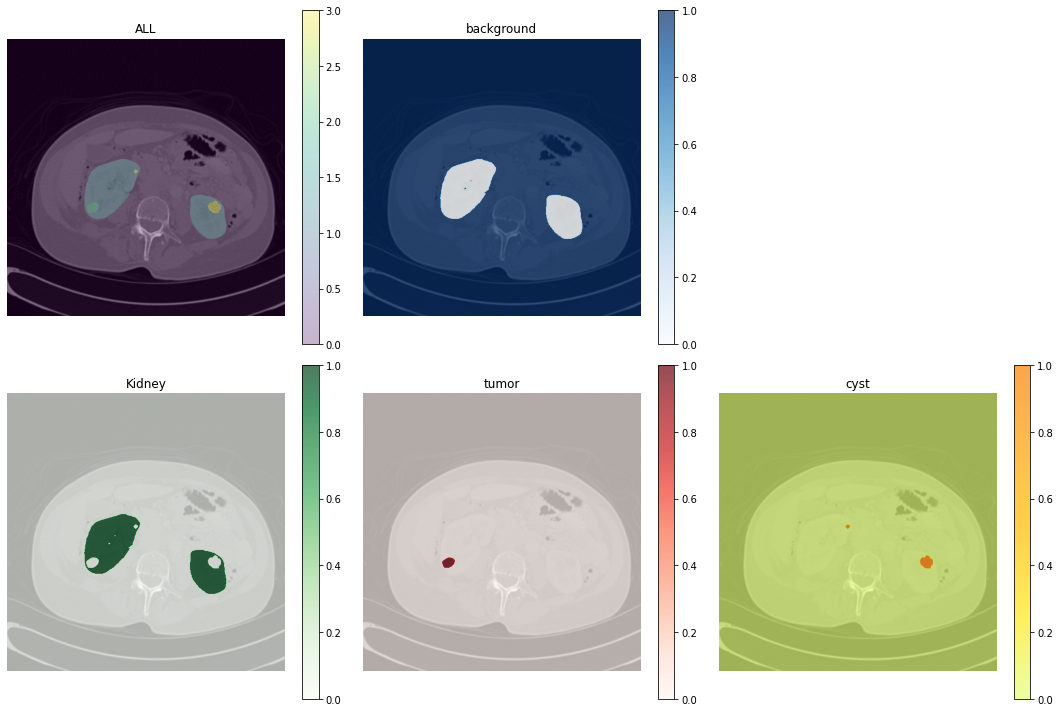

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(test_and[n_slice,:,:],alpha=0.3)
plt.title('ALL')
plt.axis('off')
plt.colorbar()

plt.subplot(232)
background = test_and[n_slice,:,:]== 0
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(background,alpha=0.7,cmap='Blues')
plt.title('background')
plt.axis('off')
plt.colorbar()

plt.subplot(234)
Kidney = test_and[n_slice,:,:]== 1
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(Kidney,alpha=0.7,cmap='Greens')
plt.title('Kidney')
plt.axis('off')
plt.colorbar()

plt.subplot(235)
tumor = test_and[n_slice,:,:]== 2
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(tumor,alpha=0.7,cmap='Reds')
plt.title('tumor')
plt.axis('off')
plt.colorbar()

plt.subplot(236)
cyst = test_and[n_slice,:,:]== 3
plt.imshow(test[n_slice,:,:],cmap='gray')
plt.imshow(cyst,alpha=0.7,cmap='Wistia')
plt.title('cyst')
plt.axis('off')
plt.colorbar()

plt.tight_layout()

## Preprocessing

In [14]:
import os
path = '/root/project/kits/kits21/kits21/data'
n_classes = 4
p = sorted(os.listdir(path))
p.remove('kits.json')

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(p, test_size=0.3, random_state=10)

In [16]:
print(len(train))
print(len(test))
print(train[0])

train = sorted(train)
test = sorted(test)

210
90
case_00235


In [17]:
test[0]

'case_00005'

In [18]:
# images = 0
# for i in tqdm(train, unit='  train_files', desc='total_images'):
#     kidney_dir = f"{path}/{i}/"
#     img_ = glob(f'{kidney_dir}imaging.nii.gz')
#     # and_ = glob(f'{kidney_dir}aggregated_AND_seg.nii.gz')
#     images += np.asarray(nib.load(img_[0]).dataobj).shape[0]
#     # print(images)
# print(images)

In [24]:
from glob import glob
path = '/root/project/kits/kits21/kits21/data'
Input_Data = []
# for i in tqdm(train,unit='    file',desc='preprocessing'):
for i in tqdm(train[:20],unit='    file',desc='preprocessing'):
# for i in tqdm(['case_00206','case_00188']):
    try:
        kidney_dir = f"{path}/{i}/"
        img_ = glob(f'{kidney_dir}imaging.nii.gz')
        and_ = glob(f'{kidney_dir}aggregated_AND_seg.nii.gz')
        modalities_dir = [img_[0], and_[0]]
        p_data = Data_Preprocessing(modalities_dir=modalities_dir)
        Input_Data.append(p_data)
    # print(modalities_dir)
    except Exception as e:
        print(e)
        print(i)

preprocessing: 100%|██████████| 20/20 [02:44<00:00,  8.20s/    file]


In [21]:
def Data_Preprocessing(modalities_dir):
    all_modalities = []    
    for modality in modalities_dir:      
        nifti_file   = nib.load(modality)
        kidney_numpy  = nifti_file.get_fdata()
        kidney_numpy = resize(kidney_numpy, (len(kidney_numpy),256,256))
        all_modalities.append(kidney_numpy)
    kidney_affine   = nifti_file.affine
    all_modalities = np.array(all_modalities)
    all_modalities = np.rint(all_modalities).astype(np.int16)
    all_modalities = all_modalities[:, :, :, :]
    # all_modalities = np.transpose(all_modalities)
    all_modalities = all_modalities.transpose((1,2,3,0))
    return all_modalities

In [8]:
print('train_data length', len(Input_Data))
total_images = 0
for i in range(len(Input_Data)):
    total_images += Input_Data[i].shape[0]
print('total_images : ', total_images)

train_data length 5
total_images :  1258


In [9]:
np.unique(Input_Data[2][:,:,:,1])

array([0, 1, 2], dtype=int16)

In [100]:
Input_Data[0].shape[0]

602

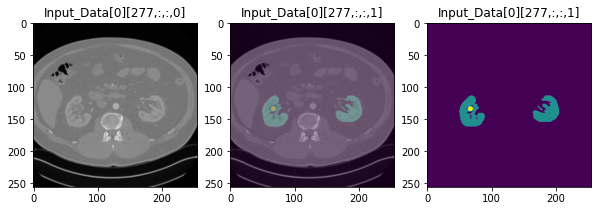

In [124]:
### 00206
a = np.random.randint(0,Input_Data[0].shape[0])
plt.figure(figsize=(10,15))

plt.subplot(131)
plt.title(f'Input_Data[0][{a},:,:,0]')
plt.imshow(Input_Data[0][a,:,:,0],cmap='gray')

plt.subplot(132)
plt.title(f'Input_Data[0][{a},:,:,1]')
plt.imshow(Input_Data[0][a,:,:,0],cmap='gray')
plt.imshow(Input_Data[0][a,:,:,1],alpha=0.3)

plt.subplot(133)
plt.title(f'Input_Data[0][{a},:,:,1]')
plt.imshow(Input_Data[0][a,:,:,1])

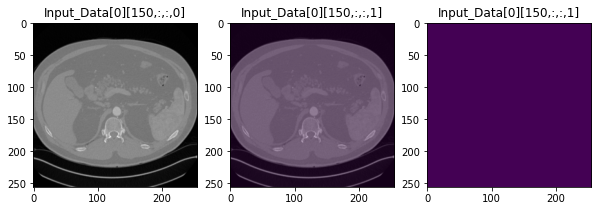

In [11]:
### 00188
a = 150

plt.figure(figsize=(10,15))

plt.subplot(131)
plt.title(f'Input_Data[0][{a},:,:,0]')
plt.imshow(Input_Data[0][a,:,:,0],cmap='gray')

plt.subplot(132)
plt.title(f'Input_Data[0][{a},:,:,1]')
plt.imshow(Input_Data[0][a,:,:,0],cmap='gray')
plt.imshow(Input_Data[0][a,:,:,1],alpha=0.3)

plt.subplot(133)
plt.title(f'Input_Data[0][{a},:,:,1]')
plt.imshow(Input_Data[0][a,:,:,1])

In [76]:
def Data_Concatenate(Input_Data):
    counter=0
    Output= []
    for i in range(2):
        # print('$')
        c=0
        counter=0
        for ii in tqdm(range(len(Input_Data))):
            if (counter != len(Input_Data)):
                a= Input_Data[counter][:,:,:,i]
                
                if(counter==0):
                    c = a
                    # c= np.concatenate((a, b), axis=0)
                    # # print('c1={}'.format(c.shape))
                    counter= counter+1
                else:
                    c= np.concatenate((c, a), axis=0)
                    # c= np.concatenate((c, c1), axis=0)
                    # print('c2={}'.format(c.shape))
                    counter= counter+1
        c= c[:,:,:,np.newaxis]
        Output.append(c)
    return Output

In [78]:
test_InData= Data_Concatenate(Input_Data) 

100%|██████████| 90/90 [02:10<00:00,  1.45s/it]


In [14]:
print('length',len(InData))
print('shape[0]',InData[0].shape)
print('shape[1]',InData[1].shape)

length 2
shape[0] (1258, 256, 256, 1)
shape[1] (1258, 256, 256, 1)


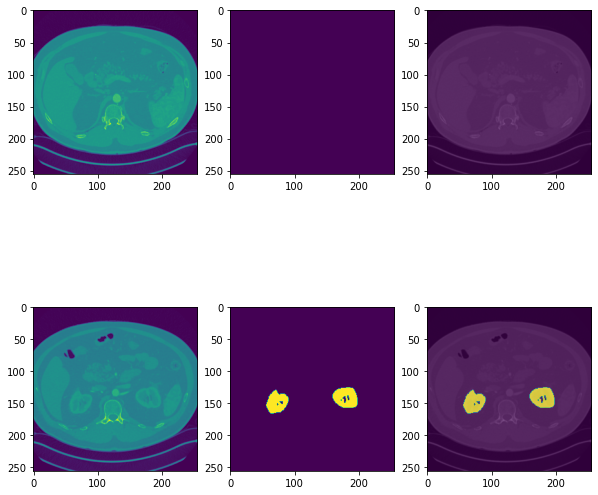

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(231)
plt.imshow(InData[0][150,:,:])
plt.subplot(232)
plt.imshow(InData[1][150,:,:])
plt.subplot(233)
plt.imshow(InData[0][150,:,:],cmap='gray')
plt.imshow(InData[1][150,:,:],alpha=0.7)

plt.subplot(234)
plt.imshow(InData[0][223,:,:])
plt.subplot(235)
plt.imshow(InData[1][223,:,:])
plt.subplot(236)
plt.imshow(InData[0][223,:,:],cmap='gray')
plt.imshow(InData[1][223,:,:],alpha=0.7)

In [79]:
InData  = test_InData.copy()

In [80]:
len(InData)

2

In [81]:
# import pickle
# with open('/root/project/code/kits/Multiseg/multi_20.pkl','wb') as f:
#     pickle.dump(InData,f)

# TRAIN DATASET

In [3]:
cd '/root/project/code/kits/Multiseg/'

/root/project/code/kits/Multiseg


In [4]:
import pickle
# with open('/root/project/code/kits/Multiseg/multi_2_AND.pkl','rb') as f:
#     InData = pickle.load(f)
with open('/root/project/code/kits/Multiseg/pkls/multi_tts_06.pkl','rb') as f:
    InData = pickle.load(f)

In [5]:
print('length',len(InData))
print('shape[0]',InData[0].shape)
print('shape[1]',InData[1].shape)

length 2
shape[0] (14138, 256, 256, 1)
shape[1] (14138, 256, 256, 1)


In [7]:
# InData = [InData[0][:9000],InData[1][:9000]]
# InData.shape
print('length',len(InData))
print('shape[0]',InData[0].shape)
print('shape[1]',InData[1].shape)

length 2
shape[0] (14138, 256, 256, 1)
shape[1] (14138, 256, 256, 1)


In [8]:
from keras.layers import concatenate
AIO= concatenate(InData, axis=3)
AIO=np.array(AIO,dtype='float32')

In [9]:
AIO.shape

(14138, 256, 256, 2)

In [10]:
del InData

In [11]:
images=np.array(AIO[:,:,:,0],dtype='float32')
masks=np.array(AIO[:,:,:,1],dtype='float32')

In [12]:
print(images.shape)
print(masks.shape)

(14138, 256, 256)
(14138, 256, 256)


In [13]:
del AIO

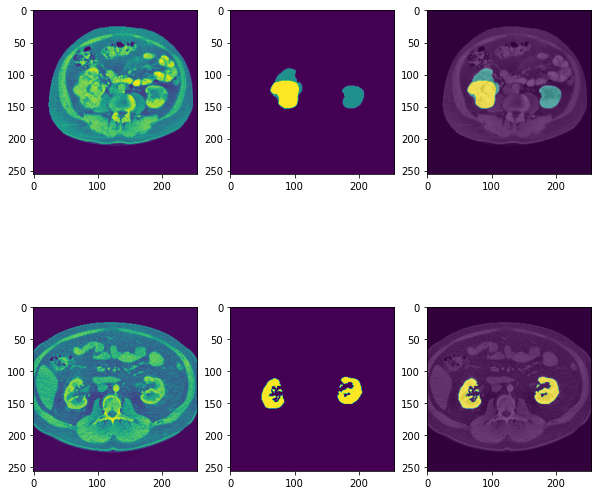

In [14]:
a,b = 320, 123


plt.figure(figsize=(10,10))
plt.subplot(231)
plt.imshow(images[a])
plt.subplot(232)
plt.imshow(masks[a])
plt.subplot(233)
plt.imshow(images[a],cmap='gray')
plt.imshow(masks[a],alpha=0.7)

plt.subplot(234)
plt.imshow(images[b])
plt.subplot(235)
plt.imshow(masks[b])
plt.subplot(236)
plt.imshow(images[b],cmap='gray')
plt.imshow(masks[b],alpha=0.7)

In [17]:
# Weights

# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# n, h, w = masks.shape
# train_masks_reshaped = masks.reshape(-1,1)
# train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
# train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
#                                                  classes = np.unique(train_masks_reshaped_encoded),
#                                                  y = train_masks_reshaped_encoded)

# class_weights = {l:c for l,c in zip(np.unique(train_masks_reshaped_encoded), class_weights)}

class_w = class_weight.compute_sample_weight(class_weight = 'balanced',
                                    # classes = np.unique(train_masks_reshaped_encoded),
                                    y = train_masks_reshaped_encoded)

class_w= {l:c for l,c in zip(np.unique(train_masks_reshaped_encoded), class_w)}
print("Class weights are...:", class_weights)
#Class weights are...: {0: 0.2555716875390948, 1: 14.043651034863641, 2: 66.2679049433803, 3: 1102.8981525108493}

KeyboardInterrupt: 

In [18]:
print(class_weights)
print(class_w)

{0: 0.2555630295068373, 1: 14.28986822601234, 2: 61.27609360095106, 3: 1295.7915428980593}


NameError: name 'class_w' is not defined

In [15]:
train_images = np.expand_dims(images, axis=3)
print(train_images.shape)
from tensorflow.keras.utils import normalize
train_images = normalize(train_images)
print(train_images.shape)

train_masks = np.expand_dims(masks, axis=3)
print(train_masks.shape)

(14138, 256, 256, 1)
(14138, 256, 256, 1)
(14138, 256, 256, 1)


In [16]:
del images
del masks

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(train_images, train_masks, test_size=0.2, random_state=32)
# X1, X_test, y1, y_test = train_test_split(train_images, train_masks, test_size=0.1, random_state=32)
# AIO=TRL=0
# X_train, x_nu, y_train, y_nu = train_test_split(X1,y1,test_size=0.2,random_state=32)

In [18]:
del train_images
del train_masks

In [19]:
# del images
# del masks
# del AIO
# del InData

In [20]:
n_classes =4

In [21]:
X_train.shape

(11310, 256, 256, 1)

In [22]:
from tensorflow.keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

In [24]:
del y_train
del train_masks_cat
del y_test
del test_masks_cat
# del train_masks_reshaped_encoded

NameError: name 'y_train' is not defined

In [25]:
print(X_train.shape)
print(y_train_cat.shape)
print(X_test.shape)
print(y_test_cat.shape)

(11310, 256, 256, 1)
(11310, 256, 256, 4)
(2828, 256, 256, 1)
(2828, 256, 256, 4)


# Model

In [26]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH= X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [27]:
print(IMG_HEIGHT)
print(IMG_WIDTH)
print(IMG_CHANNELS)
print(n_classes)

256
256
1
4


In [28]:
def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs

    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

In [29]:
def get_model():
    return multi_unet_model(n_classes=n_classes,IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

##### AUg

In [30]:
seed=24
from keras.preprocessing.image import ImageDataGenerator

img_data_gen_args = dict(rotation_range=90,
                     # width_shift_range=0.3,
                     # height_shift_range=0.3,
                     # shear_range=0.5,
                     # zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

mask_data_gen_args = dict(rotation_range=90,
                     # width_shift_range=0.3,
                     # height_shift_range=0.3,
                     # shear_range=0.5,
                     # zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')
                     # preprocessing_function = lambda x: np.where(x>0, 1, 0).astype(x.dtype))

In [31]:
image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_data_generator.fit(X_train, augment=True, seed=seed)

image_generator = image_data_generator.flow(X_train, seed=seed)
valid_img_generator = image_data_generator.flow(X_test, seed=seed)

mask_data_generator = ImageDataGenerator(**mask_data_gen_args)
mask_data_generator.fit(y_train_cat, augment=True, seed=seed)
mask_generator = mask_data_generator.flow(y_train_cat, seed=seed)
valid_mask_generator = mask_data_generator.flow(y_test_cat, seed=seed)

In [32]:
def my_image_mask_generator(image_generator, mask_generator):
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

my_generator = my_image_mask_generator(image_generator, mask_generator)

validation_datagen = my_image_mask_generator(valid_img_generator, valid_mask_generator)

In [50]:
del img_data_gen_args
del mask_data_gen_args
del image_data_generator
del valid_img_generator
del image_generator
del mask_data_generator
del mask_generator
del valid_mask_generator

##### Compile

In [30]:
# model = multi_unet_model(4,512,512,1)
from focal_loss import BinaryFocalLoss
model = get_model()
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',loss=BinaryFocalLoss(gamma=2), metrics=['accuracy'])
model.summary

print(model.input_shape)
print(model.output_shape)

(None, 256, 256, 1)
(None, 256, 256, 4)


## FIT

In [31]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience=2, mode='auto')

In [32]:
history = model.fit(X_train, y_train_cat, 
                    batch_size =8, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test_cat), 
                    # class_weight={0: 0.2555630295068373, 1: 14.28986822601234, 2: 61.27609360095106, 3: 1295.7915428980593},
                    # class_weight = class_weight,
                    # callbacks = [early_stopping],
                    shuffle=False)

Epoch 1/100
 989/1414 [===================>..........] - ETA: 32s - loss: 0.0152 - accuracy: 0.9760

KeyboardInterrupt: 

In [42]:
# batch_size = 4 
# steps_per_epoch = 3*(len(X_train))//batch_size
# history = model.fit(my_generator,
#                     # batch_size = 4,
#                     verbose=1, 
#                     epochs=20, 
#                     # validation_data=(X_test, y_test_cat), 
#                     validation_data = validation_datagen,
#                     steps_per_epoch=steps_per_epoch, 
#                     validation_steps=steps_per_epoch,
#                     # class_weight={0: 0.2555716875390948, 1: 14.043651034863641, 2: 66.2679049433803, 3: 1102.8981525108493},
#                     shuffle=False)

Epoch 1/20
 143/8482 [..............................] - ETA: 1:14:48 - loss: 0.0216 - accuracy: 0.9751

KeyboardInterrupt: 

# HISTORY

In [38]:
model.save('/root/project/code/kits/model/Multi_sample_Test.h5')

In [40]:
hist_df = pd.DataFrame(history.history)
hist_df.to_csv('/root/project/code/kits/model/Multi_sample_Test.csv')

# Evaluation

In [41]:
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")

8/8 [==============================] - 2s 126ms/step - loss: 0.0017 - accuracy: 0.9993
Accuracy is =  99.93178844451904 %


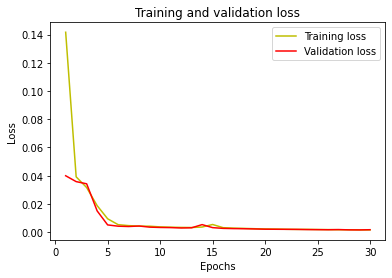

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

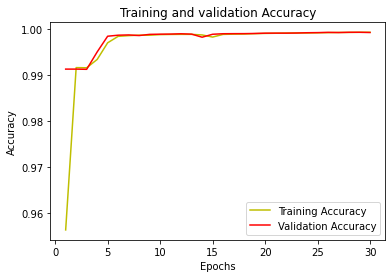

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [44]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)

In [45]:
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.76755446


[[1.6365666e+07 6.3330000e+03 1.0000000e+00 1.0000000e+00]
 [2.9440000e+03 1.3522000e+05 8.0000000e+01 7.0000000e+00]
 [8.3000000e+01 1.0160000e+03 1.5170000e+03 1.7000000e+01]
 [1.7400000e+02 3.4600000e+02 2.6300000e+02 1.4040000e+03]]
IoU for class1 is:  0.99941766
IoU for class2 is:  0.92650706
IoU for class3 is:  0.5095734
IoU for class4 is:  0.6347197


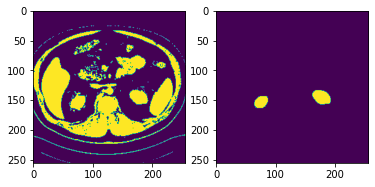

In [46]:
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
print("IoU for class4 is: ", class4_IoU)

plt.subplot(121)
plt.imshow(train_images[200, :,:,0])
plt.subplot(122)
plt.imshow(train_masks[200, :,:])


In [47]:
train_masks.shape

(1258, 256, 256, 1)

# Inference

In [48]:
# model = multi_unet_model(4,512,512,1)
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 1
n_classes = 4
model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

print(model.input_shape)
print(model.output_shape)

(None, 256, 256, 1)
(None, 256, 256, 4)


In [49]:
model.load_weights('/root/project/code/kits/model/Multi_sample_Test.h5')

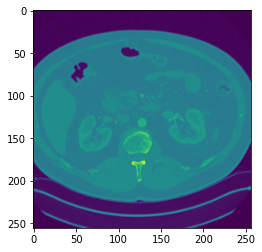

In [57]:
immg = images[250,:,:]
plt.imshow(immg)

In [58]:
images.shape

(1258, 256, 256)

In [125]:
from glob import glob
path = '/root/project/kits/kits21/kits21/data'
Input_Data = []
# for i in tqdm(train,unit='    file',desc='preprocessing'):
for i in tqdm(test[:5],unit='    file',desc='preprocessing'):
# for i in tqdm(['case_00206','case_00188']):
    try:
        kidney_dir = f"{path}/{i}/"
        img_ = glob(f'{kidney_dir}imaging.nii.gz')
        and_ = glob(f'{kidney_dir}aggregated_AND_seg.nii.gz')
        modalities_dir = [img_[0], and_[0]]
        p_data = Data_Preprocessing(modalities_dir=modalities_dir)
        Input_Data.append(p_data)
    # print(modalities_dir)
    except Exception as e:
        print(e)
        print(i)

preprocessing: 100%|██████████| 5/5 [01:00<00:00, 12.13s/    file]


In [126]:
print('test_data length', len(Input_Data))
total_images = 0
for i in range(len(Input_Data)):
    total_images += Input_Data[i].shape[0]
print('test_images : ', total_images)

test_data length 5
test_images :  1781


In [127]:
np.unique(Input_Data[2][:,:,:,1])

array([0, 1, 2, 3], dtype=int16)

In [128]:
def Data_Concatenate(Input_Data):
    counter=0
    Output= []
    for i in range(2):
        # print('$')
        c=0
        counter=0
        for ii in tqdm(range(len(Input_Data))):
            if (counter != len(Input_Data)):
                a= Input_Data[counter][:,:,:,i]
                
                if(counter==0):
                    c = a
                    # c= np.concatenate((a, b), axis=0)
                    # # print('c1={}'.format(c.shape))
                    counter= counter+1
                else:
                    c= np.concatenate((c, a), axis=0)
                    # c= np.concatenate((c, c1), axis=0)
                    # print('c2={}'.format(c.shape))
                    counter= counter+1
        c= c[:,:,:,np.newaxis]
        Output.append(c)
    return Output

In [129]:
Test_InData= Data_Concatenate(Input_Data)

100%|██████████| 5/5 [00:00<00:00, 19.36it/s]


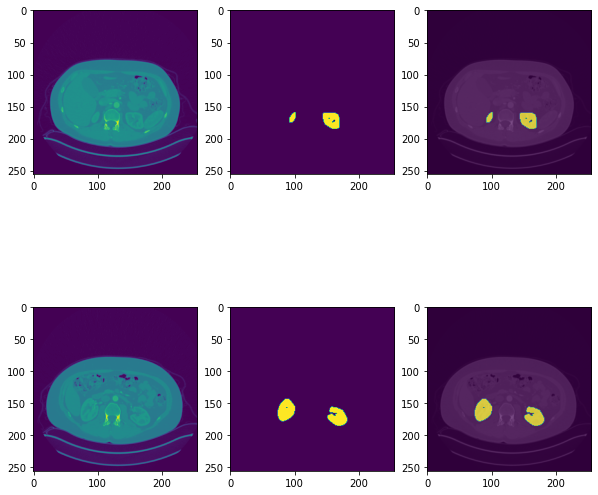

In [130]:
plt.figure(figsize=(10,10))
plt.subplot(231)
plt.imshow(Test_InData[0][150,:,:])
plt.subplot(232)
plt.imshow(Test_InData[1][150,:,:])
plt.subplot(233)
plt.imshow(Test_InData[0][150,:,:],cmap='gray')
plt.imshow(Test_InData[1][150,:,:],alpha=0.7)

plt.subplot(234)
plt.imshow(Test_InData[0][223,:,:])
plt.subplot(235)
plt.imshow(Test_InData[1][223,:,:])
plt.subplot(236)
plt.imshow(Test_InData[0][223,:,:],cmap='gray')
plt.imshow(Test_InData[1][223,:,:],alpha=0.7)

In [131]:
from keras.layers import concatenate
AIOtt= concatenate(InData, axis=3)
AIOtt=np.array(AIO,dtype='float32')

In [132]:
tt_images=np.array(AIO[:,:,:,0],dtype='float32')
tt_masks=np.array(AIO[:,:,:,1],dtype='float32')

In [139]:
tt_images.shape

(1258, 256, 256)

In [133]:
pref_ = model.predict(tt_images)

In [135]:
pref_.shape

(1258, 256, 256, 4)

In [136]:
pref_[0].shape

(256, 256, 4)

In [141]:
TR = tt_images
TRL = tt_masks
pref_Tumor = pref_

In [156]:
TR.shape[0]

1258

In [200]:
a = 230

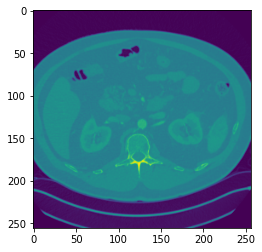

In [228]:
plt.imshow(TR[230,:,:])

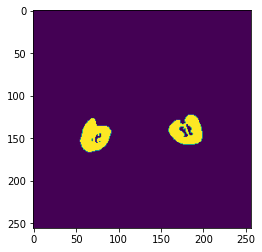

In [229]:
plt.imshow(TRL[230,:,:])

In [232]:
pref_Tumor[230,:,:,2].max()

0.0

1.0

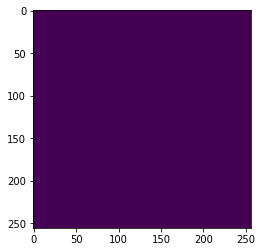

In [230]:
plt.imshow(pref_Tumor[230,:,:,2])
pref_Tumor[a,:,:,2].max()

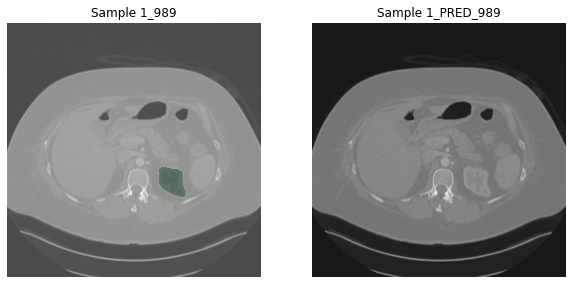

In [285]:

plt.figure(figsize=(10,20))

a = np.random.randint(TR.shape[0])
b = np.random.randint(TR.shape[0])
c = np.random.randint(TR.shape[0])
d = np.random.randint(TR.shape[0])


# plt.subplot(441)
plt.subplot(121)
plt.title(f'Sample 1_{a}')
plt.axis('off')
plt.imshow(np.squeeze(TR[a,:,:]),cmap='gray')
# plt.imshow(TR[250,:,:],cmap='gray')
plt.imshow(np.squeeze(TRL[a,:,:]),alpha=0.3,cmap='Greens')
# plt.colorbar()

# plt.subplot(442)
plt.subplot(122)
plt.title(f'Sample 1_PRED_{a}')
plt.axis('off')
plt.imshow(np.squeeze(TR[a,:,:]),cmap='gray')
# plt.imshow(np.squeeze(pref_Tumor[a,:,:,0]),alpha=0.9,cmap='Reds')
# plt.imshow(np.squeeze(pref_Tumor[a,:,:,1]),alpha=0.5,cmap='Blues')
plt.imshow(np.squeeze(pref_Tumor[a,:,:,2]),alpha=0.1,cmap='Reds')
# plt.imshow(np.squeeze(pref_Tumor[a,:,:,3]),alpha=0.1,cmap='Reds')

plt.show()

In [161]:
a

334

In [2]:
import pickle
with open('/root/project/code/kits/Multiseg/pkls/multi_105_AND.pkl','rb') as f:
    InData = pickle.load(f)

In [4]:
len(InData)

2

# Large (not)

In [50]:
model.load_weights('/root/project/code/kits/model/multi_105_AND.h5')

In [102]:
test[0]

'case_00005'

In [103]:
from patchify import patchify, unpatchify
import cv2

In [104]:
images = nib.load('/root/project/kits/kits21/kits21/data/case_00005/imaging.nii.gz').get_fdata()
images.shape

(834, 512, 512)

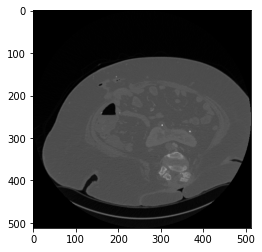

In [105]:
plt.imshow(images[400],cmap='gray')

In [106]:
patches = patchify(images[400], (256,256), step = 256)

In [110]:
patches.shape

(2, 2, 256, 256)

In [111]:
pred_patches = []
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        print(i,j)
        single_patch = patches[i,j,:,:]

0 0
0 1
1 0
1 1


# PP

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
def show_slice_window(slice, level, window):
    max = level + window/2
    min = level + window/2
    slice = slice.clip(min,max)
    plt.figure()
    plt.imshow(slice.T, cmap='gray', origin='lower')

In [6]:
import nibabel as nib
ct_img = nib.load('/root/project/kits/kits21/kits21/data/case_00000/imaging.nii.gz')
print(ct_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (611, 512, 512)
affine: 
[[ 0.          0.         -0.91992188  0.        ]
 [ 0.         -0.91992188  0.          0.        ]
 [-0.5         0.          0.          0.        ]
 [ 0.          0.          0.          1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 611 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.        0.5       0.9199219 0.9199219 1.        1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset

In [7]:
def find_pix_dim(ct_img):
    """
    Get the pixdim of the CT image.
    A general solution that gets the pixdim indicated from the image dimensions. From the last 2 image dimensions, we get their pixel dimension.
    Args:
        ct_img: nib image

    Returns: List of the 2 pixel dimensions
    """
    pix_dim = ct_img.header["pixdim"] # example [1,2,1.5,1,1]
    dim = ct_img.header["dim"] # example [1,512,512,1,1]
    max_indx = np.argmax(dim)
    pixdimX = pix_dim[max_indx]
    dim = np.delete(dim, max_indx)
    pix_dim = np.delete(pix_dim, max_indx)
    max_indy = np.argmax(dim)
    pixdimY = pix_dim[max_indy]
    return [pixdimX, pixdimY] # example [2, 1.5]

In [8]:
def intensity_seg(ct_numpy, min=-1000, max=-300):
   clipped = clip_ct(ct_numpy, min, max)
   return measure.find_contours(clipped, 0.95)